## Loading data set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [2]:
path = os.path.abspath('./datasets/SDNET2018/W/') # Training including walls

### Preprocessing training data

In [3]:
### Training dataset

img_height= 160
img_width= 160
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names=['CD', 'UD'],
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
)

### Test dataset

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names=['CD', 'UD'],
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
)

# most of the values are set y default, check later

Found 13620 files belonging to 2 classes.
Using 9534 files for training.
Found 13620 files belonging to 2 classes.
Using 4086 files for validation.


In [4]:
### Verify names for classes

class_names = train_dataset.class_names
class_names

['CD', 'UD']

### Visualizing images contained in dataset:

<ipython-input-5-ea7056c0e84e>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(5, 5, i + 1)


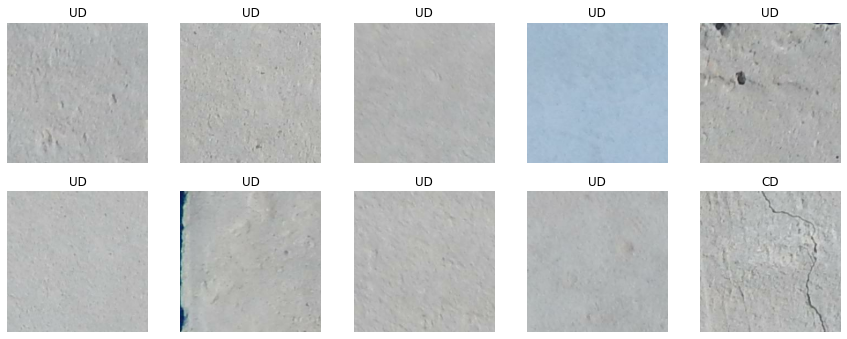

In [5]:
plt.figure(figsize=(15, 15))

for images, labels in train_dataset.take(6):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Rescaling pixels' values

The data provided is RGB therefore the values are in the [0,255] range. Due to it's more convenience to develop the neural network, the values will be rescaled.

In [6]:
### Verifying pixels' scale:

for images, labels in train_dataset.take(1):
    print("Scale max and min of pixels:")
    print(np.min(images), np.max(images))

Scale max and min of pixels:
0.0 228.06001


In [7]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))

In [8]:
image_batch, labels_batch = next(iter(normalized_train_dataset))
first_image = image_batch[0]
print("Scale max and min of pixels:")
print(np.min(first_image), np.max(first_image))

Scale max and min of pixels:
0.405098 0.8244707


The dataset can be also normalized by adding a rescaling layer to the neural network (See: 2. Training Model)

## Training model

#### Configure for performance

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Training model

In [10]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
epochs_value = 4
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs= epochs_value
)

Epoch 1/4
298/298 [==============================] - 172s 577ms/step - loss: 0.8207 - accuracy: 0.8460 - val_loss: 0.4148 - val_accuracy: 0.8561
Epoch 2/4
298/298 [==============================] - 171s 574ms/step - loss: 0.4276 - accuracy: 0.8493 - val_loss: 0.4130 - val_accuracy: 0.8561
Epoch 3/4
298/298 [==============================] - 170s 572ms/step - loss: 0.4306 - accuracy: 0.8493 - val_loss: 0.4124 - val_accuracy: 0.8561
Epoch 4/4
298/298 [==============================] - 166s 557ms/step - loss: 0.4259 - accuracy: 0.8493 - val_loss: 0.4119 - val_accuracy: 0.8561


In [13]:
# model.summary()

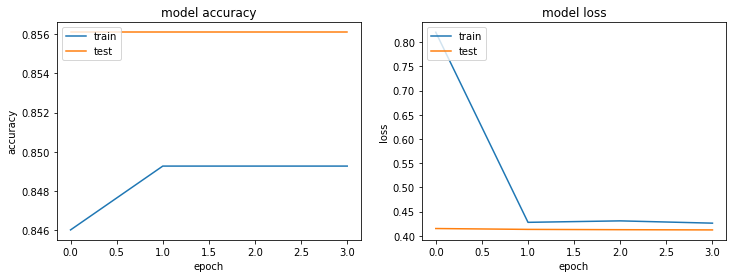

In [13]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print('A first prediction model has been trained...')

A first prediction model has been trained...


Predictions:
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
Certainty:
 [30.706375 73.298386 29.460585 71.5021   27.638912 72.946106 27.942553
 72.63842  28.303099 73.22077  28.18461  72.15478  28.482193 72.484024
 60.739647 72.54886  28.65806  73.00727  27.37413  72.793724 27.98286
 73.097694 28.372807 72.26304  27.992376 72.607735 28.271427 73.31261
 28.224075 72.76843  29.191488 71.59785  27.874207 73.082146 28.313648
 72.65831  30.131262 72.90386  67.34353  79.42934  32.802868 74.31007
 27.984365 72.702286 28.707188 72.11815  30.59028  72.93592  27.761162
 72.86399  27.8362   72.37198  30.054438 73.536995 27.858007 73.13016
 29.194937 71.054085 31.815933 71.939926 33.17448  71.24864  31.587843
 69.5882  ]
Labels:
 [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


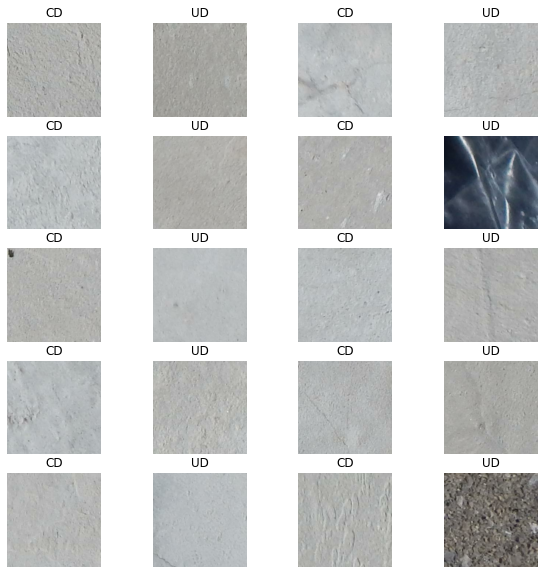

In [49]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
certainty = predictions*100
predictions = tf.where(predictions < 0.7, 0, 1)   #### Values found with more than 70% are classified as possitives
certainty = tf.where(certainty < 70, certainty , certainty )


print('Predictions:\n', predictions.numpy())
print('Certainty:\n', certainty.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

## Tuning the model

### Data augmentation

*Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting then using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.*

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False,
    vertical_flip=False, rescale=None, preprocessing_function=None,
    data_format=None, validation_split=0.0, dtype=None
)

<ipython-input-16-40b7d1678a7f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(4, 4, i + 1)


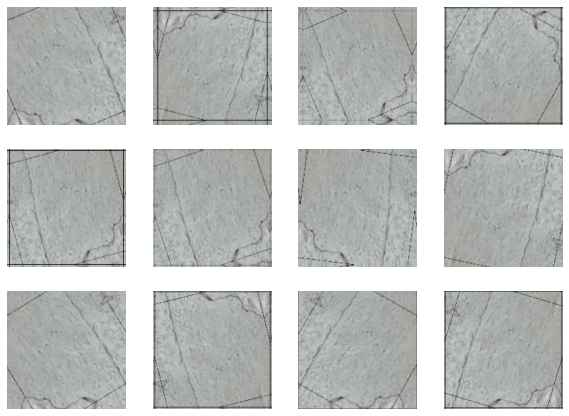

In [16]:
plt.figure(figsize=(10, 10))
for images, figure in train_dataset.take(2):
  for i in range(12):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Compile and train improved model

***Improvements:***
1. Data augmentation layer to increase training data.
2. Dropout layer to reduce overfitting
4. Tunning adam optimizer with learning rate
3. Increase number of epochs

Epoch 1/3
298/298 [==============================] - 284s 952ms/step - loss: 151.6523 - accuracy: 0.8433 - val_loss: 0.4149 - val_accuracy: 0.8561
Epoch 2/3
298/298 [==============================] - 278s 932ms/step - loss: 0.4281 - accuracy: 0.8493 - val_loss: 0.4134 - val_accuracy: 0.8561
Epoch 3/3
298/298 [==============================] - 282s 945ms/step - loss: 0.4283 - accuracy: 0.8493 - val_loss: 0.4130 - val_accuracy: 0.8561


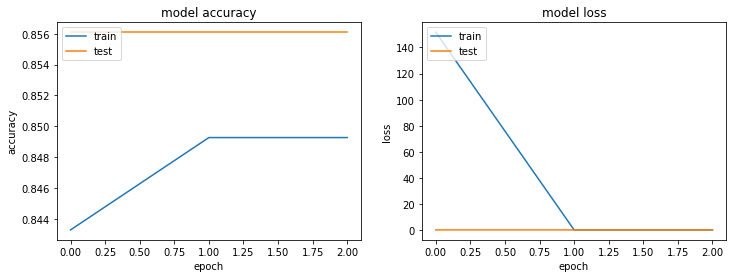

In [17]:
num_classes = 2
epochs_value = 3

model = tf.keras.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

opt = tf.keras.optimizers.Adam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

model.compile(
  optimizer=opt,
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs= epochs_value
)

# summarize history for accuracy

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Create the base model from the pre-trained convnets



In [18]:
# Create the base model from the pre-trained model MobileNet V2
BATCH_SIZE = 64
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



In [19]:
IMG_SHAPE

(160, 160, 3)

In [20]:
### Preprocess input according with scale expected for mobilenetV2

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [21]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


This feature extractor converts each 160x160x3 image into a 8x8x1280 block of features. Let's see what it does to an example batch of images:

In [22]:
### Feature extraction

In [23]:
### Freeze the convolutional base

In [24]:
base_model.trainable = False

In [25]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [26]:
### Add a classification head

In [27]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [28]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value.  Positive numbers predict class 1, negative numbers predict class 0.

In [29]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [30]:
base_learning_rate = 0.0002
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)             

In [32]:
len(model.trainable_variables)

2

In [34]:
initial_epochs = 5

loss0, accuracy0 = model.evaluate(test_dataset)

128/128 [==============================] - 90s 705ms/step - loss: 0.4464 - accuracy: 0.8409


In [35]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.45
initial accuracy: 0.84


In [36]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset)

Epoch 1/5
298/298 [==============================] - 234s 786ms/step - loss: 0.4496 - accuracy: 0.8180 - val_loss: 0.3590 - val_accuracy: 0.8779
Epoch 2/5
298/298 [==============================] - 210s 706ms/step - loss: 0.4056 - accuracy: 0.8443 - val_loss: 0.3354 - val_accuracy: 0.8860
Epoch 3/5
298/298 [==============================] - 212s 712ms/step - loss: 0.3942 - accuracy: 0.8507 - val_loss: 0.3272 - val_accuracy: 0.8918
Epoch 4/5
298/298 [==============================] - 211s 710ms/step - loss: 0.3722 - accuracy: 0.8615 - val_loss: 0.3172 - val_accuracy: 0.8960
Epoch 5/5
298/298 [==============================] - 196s 656ms/step - loss: 0.3681 - accuracy: 0.8592 - val_loss: 0.3119 - val_accuracy: 0.8972


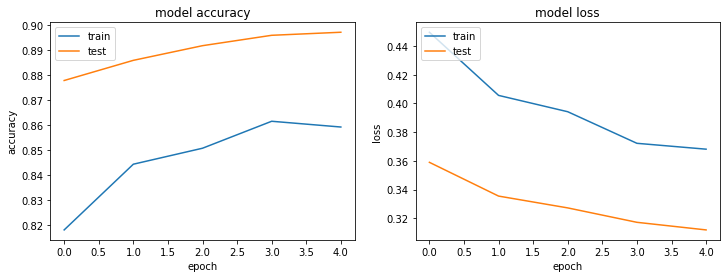

In [38]:
# summarize history for accuracy

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating model after transfering-learning

In [39]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

128/128 [==============================] - 49s 385ms/step - loss: 0.3119 - accuracy: 0.8972
Test accuracy : 0.8972100019454956


Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
Labels:
 [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


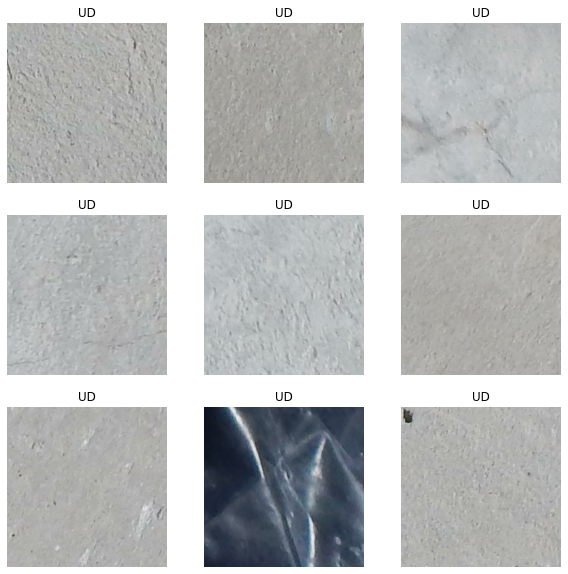

In [40]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [44]:
model.save('trained_models/model_crack_detention.h5')
model.save_weights('trained_models/weights_crack_detention.h5')

## Fine Tuning

#### Un-freeze the top layers of the model

In [45]:
base_model.trainable = True

In [46]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  155


In [47]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [48]:
### Compile the model

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/100),
              metrics=['accuracy'])

In [49]:
len(model.trainable_variables)

58

In [50]:
### Continue training the model

In [51]:
fine_tune_epochs = 3
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test_dataset)

Epoch 5/8
298/298 [==============================] - 296s 995ms/step - loss: 0.3614 - accuracy: 0.8653 - val_loss: 0.3034 - val_accuracy: 0.8975
Epoch 6/8
298/298 [==============================] - 278s 934ms/step - loss: 0.3540 - accuracy: 0.8712 - val_loss: 0.2993 - val_accuracy: 0.8965
Epoch 7/8
298/298 [==============================] - 275s 924ms/step - loss: 0.3431 - accuracy: 0.8744 - val_loss: 0.2971 - val_accuracy: 0.8960
Epoch 8/8
298/298 [==============================] - 277s 931ms/step - loss: 0.3367 - accuracy: 0.8763 - val_loss: 0.2945 - val_accuracy: 0.8997


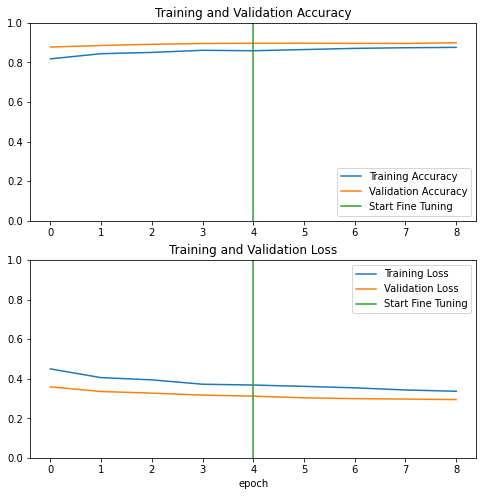

In [52]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [54]:
### Evaluation and prediction

In [55]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

128/128 [==============================] - 48s 378ms/step - loss: 0.2945 - accuracy: 0.8997
Test accuracy : 0.8996573686599731


Predictions:
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
Labels:
 [1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


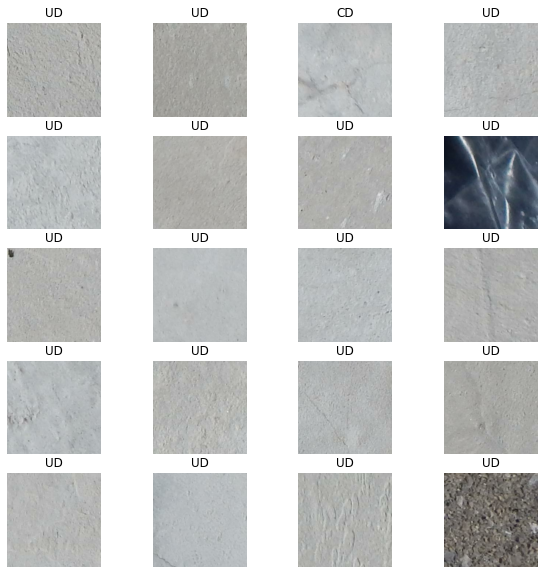

In [58]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [59]:
model.save('trained_models/model_fine_tuned_crack_detection.h5')
model.save_weights('trained_models/weights_fine_tuned_crack_detection.h5')